In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# PREPROCESSING DATA

In [2]:
df = pd.read_csv('TELCO_CUST_CHURN.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


__CHECKING MISSING VALUE__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0 missing value now, but we will check it later

__CHECKING DUPLICATE VALUE__

In [4]:
df.duplicated().sum()

0

0 duplicate value!

__Converting TotalCharges to float__

converting TotalCharges from object to float because the value is float

In [5]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

there is string (' ') in TotalCharges column, we can drop if < 5% of total rows

In [6]:
df["TotalCharges"] = (pd.to_numeric(df["TotalCharges"],errors="coerce"))

change to numeric

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.isna().sum() * 100/len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [9]:
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

0.1561834445548772

The missing value < 5% of total rows, we can drop it

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## LABEL ENCODING

__Perform label coding because values in the column is only 2__

Convert to label encoding and drop the original column to avoid the multicollinearity

In [13]:
le = preprocessing.LabelEncoder()
le.fit(df['Partner'])
df['Partner_label'] = le.transform(df['Partner'])

In [14]:
df = df.drop(columns=['Partner'])

In [15]:
le = preprocessing.LabelEncoder()
le.fit(df['Dependents'])
df['Dependents_label'] = le.transform(df['Dependents'])

In [16]:
df = df.drop(columns=['Dependents'])

In [17]:
le = preprocessing.LabelEncoder()
le.fit(df['PhoneService'])
df['PhoneService_label'] = le.transform(df['PhoneService'])

In [18]:
df = df.drop(columns=['PhoneService'])

In [19]:
le = preprocessing.LabelEncoder()
le.fit(df['PaperlessBilling'])
df['PaperlessBilling_label'] = le.transform(df['PaperlessBilling'])

In [20]:
df = df.drop(columns=['PaperlessBilling'])

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Churn'])
df['Churn_label'] = le.transform(df['Churn'])

In [22]:
df = df.drop(columns=['Churn'])

In [23]:
le = preprocessing.LabelEncoder()
le.fit(df['gender'])
df['gender_label'] = le.transform(df['gender'])

In [24]:
df = df.drop(columns=['gender'])

In [25]:
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,No phone service,DSL,No,Yes,No,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,No,DSL,Yes,No,Yes,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,Yes,DSL,Yes,No,Yes,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,No phone service,DSL,Yes,No,No,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,Yes,Fiber optic,No,No,No,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


## FREQUENCY ENCODING

__Perform frequency encoding because values in the column > 2__

In [26]:
count_freq_MultipleLines = df.groupby('MultipleLines').size()
count_freq_MultipleLines

MultipleLines
No                  3385
No phone service     680
Yes                 2967
dtype: int64

In [27]:
freq_ = count_freq_MultipleLines/len(df['MultipleLines'])
df['MultipleLines'] = df['MultipleLines'].map(freq_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,DSL,No,Yes,No,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,DSL,Yes,No,Yes,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,DSL,Yes,Yes,No,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,DSL,Yes,No,Yes,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,Fiber optic,No,No,No,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,DSL,Yes,No,Yes,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,Fiber optic,No,Yes,Yes,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,DSL,Yes,No,No,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,Fiber optic,No,No,No,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [28]:
count_freq_InternetService = df.groupby('InternetService').size()
count_freq_InternetService

InternetService
DSL            2416
Fiber optic    3096
No             1520
dtype: int64

In [29]:
freq1_ = count_freq_InternetService/len(df['InternetService'])
df['InternetService'] = df['InternetService'].map(freq1_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,No,Yes,No,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,Yes,No,Yes,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,Yes,Yes,No,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,Yes,No,Yes,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,No,No,No,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,Yes,No,Yes,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,No,Yes,Yes,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,Yes,No,No,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,No,No,No,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [30]:
count_freq_OnlineSecurity = df.groupby('OnlineSecurity').size()
count_freq_OnlineSecurity

OnlineSecurity
No                     3497
No internet service    1520
Yes                    2015
dtype: int64

In [31]:
freq2_ = count_freq_OnlineSecurity/len(df['OnlineSecurity'])
df['OnlineSecurity'] = df['OnlineSecurity'].map(freq2_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,Yes,No,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,No,Yes,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,Yes,No,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,No,Yes,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,No,No,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,No,Yes,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,Yes,Yes,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,No,No,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,No,No,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [32]:
count_freq_OnlineBackup = df.groupby('OnlineBackup').size()
count_freq_OnlineBackup

OnlineBackup
No                     3087
No internet service    1520
Yes                    2425
dtype: int64

In [33]:
freq3_ = count_freq_OnlineBackup/len(df['OnlineBackup'])
df['OnlineBackup'] = df['OnlineBackup'].map(freq3_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,No,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,Yes,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,No,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,Yes,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,No,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,Yes,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,Yes,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,No,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,No,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [34]:
count_freq_DeviceProtection = df.groupby('DeviceProtection').size()
count_freq_DeviceProtection

DeviceProtection
No                     3094
No internet service    1520
Yes                    2418
dtype: int64

In [35]:
freq4_ = count_freq_DeviceProtection/len(df['DeviceProtection'])
df['DeviceProtection'] = df['DeviceProtection'].map(freq4_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,No,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,No,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,No,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,Yes,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,No,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,Yes,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,No,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,No,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,No,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [36]:
count_freq_TechSupport = df.groupby('TechSupport').size()
count_freq_TechSupport

TechSupport
No                     3472
No internet service    1520
Yes                    2040
dtype: int64

In [37]:
freq5_ = count_freq_TechSupport/len(df['TechSupport'])
df['TechSupport'] = df['TechSupport'].map(freq5_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,0.49,No,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,0.49,No,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,0.49,No,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,0.29,No,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,0.49,No,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,0.29,Yes,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,0.49,Yes,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,0.49,No,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,0.49,No,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [38]:
count_freq_StreamingTV = df.groupby('StreamingTV').size()
count_freq_StreamingTV

StreamingTV
No                     2809
No internet service    1520
Yes                    2703
dtype: int64

In [39]:
freq6_ = count_freq_StreamingTV/len(df['StreamingTV'])
df['StreamingTV'] = df['StreamingTV'].map(freq6_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,0.49,0.40,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,0.49,0.40,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,0.49,0.40,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,0.29,0.40,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,0.29,0.38,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,0.49,0.38,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,0.49,0.40,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [40]:
count_freq_StreamingMovies = df.groupby('StreamingMovies').size()
count_freq_StreamingMovies

StreamingMovies
No                     2781
No internet service    1520
Yes                    2731
dtype: int64

In [41]:
freq7_ = count_freq_StreamingMovies/len(df['StreamingMovies'])
df['StreamingMovies'] = df['StreamingMovies'].map(freq7_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,0.49,0.40,...,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,0.49,0.40,...,One year,Mailed check,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,0.49,0.40,...,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,0.29,0.40,...,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,0.29,0.38,...,One year,Mailed check,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,0.49,0.38,...,One year,Credit card (automatic),103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,0.49,0.40,...,Month-to-month,Electronic check,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,Mailed check,74.40,306.60,1,0,1,1,1,1


In [42]:
count_freq_PaymentMethod = df.groupby('PaymentMethod').size()
count_freq_PaymentMethod

PaymentMethod
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
dtype: int64

In [43]:
freq8_ = count_freq_PaymentMethod/len(df['PaymentMethod'])
df['PaymentMethod'] = df['PaymentMethod'].map(freq8_).round(2)
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,0.49,0.40,...,Month-to-month,0.34,29.85,29.85,1,0,0,1,0,0
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,0.49,0.40,...,One year,0.23,56.95,1889.50,0,0,1,0,0,1
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,0.49,0.40,...,Month-to-month,0.23,53.85,108.15,0,0,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,0.29,0.40,...,One year,0.22,42.30,1840.75,0,0,0,0,0,1
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,0.34,70.70,151.65,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,0.29,0.38,...,One year,0.23,84.80,1990.50,1,1,1,1,0,1
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,0.49,0.38,...,One year,0.22,103.20,7362.90,1,1,1,1,0,0
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,0.49,0.40,...,Month-to-month,0.34,29.60,346.45,1,1,0,1,0,0
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,0.49,0.40,...,Month-to-month,0.23,74.40,306.60,1,0,1,1,1,1


## ORDINAL ENCODING

__Perform ordinal encoding because there is a hierarchy__

Convert to label encoding and drop the original column to avoid the multicollinearity

In [44]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [45]:
hi_contract = {
    'Month-to-month':1,
    'One year': 2,
    'Two year':3,
}

In [46]:
df['contracts'] = df['Contract'].map(hi_contract)

In [47]:
df = df.drop(columns=['Contract'])

In [48]:
df

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,Churn_label,gender_label,contracts
0,7590-VHVEG,0,1,0.10,0.34,0.50,0.34,0.44,0.49,0.40,...,0.34,29.85,29.85,1,0,0,1,0,0,1
1,5575-GNVDE,0,34,0.48,0.34,0.29,0.44,0.34,0.49,0.40,...,0.23,56.95,1889.50,0,0,1,0,0,1,2
2,3668-QPYBK,0,2,0.48,0.34,0.29,0.34,0.44,0.49,0.40,...,0.23,53.85,108.15,0,0,1,1,1,1,1
3,7795-CFOCW,0,45,0.10,0.34,0.29,0.44,0.34,0.29,0.40,...,0.22,42.30,1840.75,0,0,0,0,0,1,2
4,9237-HQITU,0,2,0.48,0.44,0.50,0.44,0.44,0.49,0.40,...,0.34,70.70,151.65,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0.42,0.34,0.29,0.44,0.34,0.29,0.38,...,0.23,84.80,1990.50,1,1,1,1,0,1,2
7039,2234-XADUH,0,72,0.42,0.44,0.50,0.34,0.34,0.49,0.38,...,0.22,103.20,7362.90,1,1,1,1,0,0,2
7040,4801-JZAZL,0,11,0.10,0.34,0.29,0.44,0.44,0.49,0.40,...,0.34,29.60,346.45,1,1,0,1,0,0,1
7041,8361-LTMKD,1,4,0.42,0.44,0.50,0.44,0.44,0.49,0.40,...,0.23,74.40,306.60,1,0,1,1,1,1,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7032 non-null   object 
 1   SeniorCitizen           7032 non-null   int64  
 2   tenure                  7032 non-null   int64  
 3   MultipleLines           7032 non-null   float64
 4   InternetService         7032 non-null   float64
 5   OnlineSecurity          7032 non-null   float64
 6   OnlineBackup            7032 non-null   float64
 7   DeviceProtection        7032 non-null   float64
 8   TechSupport             7032 non-null   float64
 9   StreamingTV             7032 non-null   float64
 10  StreamingMovies         7032 non-null   float64
 11  PaymentMethod           7032 non-null   float64
 12  MonthlyCharges          7032 non-null   float64
 13  TotalCharges            7032 non-null   float64
 14  Partner_label           7032 non-null   int32

Now the data looks good for modelling!

# MODELLING

In [ ]:
df = df.drop(columns=['customerID'])

dropping customerID because it contains unique values and we dont need it for our model

__CHECKING MULTICOLLINEARITY__

<Axes: >

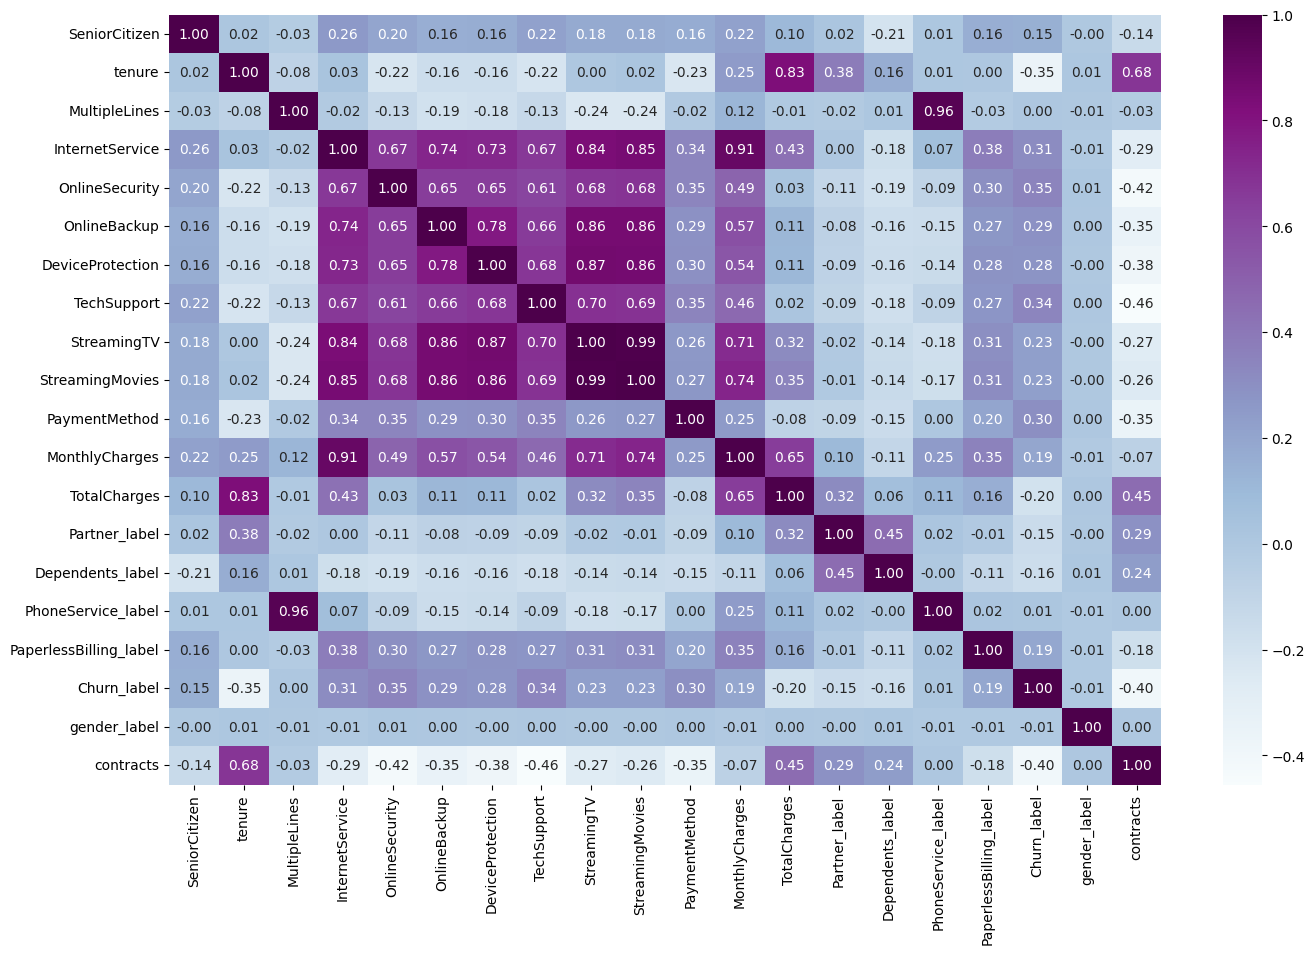

In [57]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

we dont need to drop it, because we're not using regression model

__CHECKING OUTLIERS__

In [52]:
numsbin = ['SeniorCitizen','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Partner_label','Dependents_label','PhoneService_label','PaperlessBilling_label','Churn_label','gender_label','contracts']

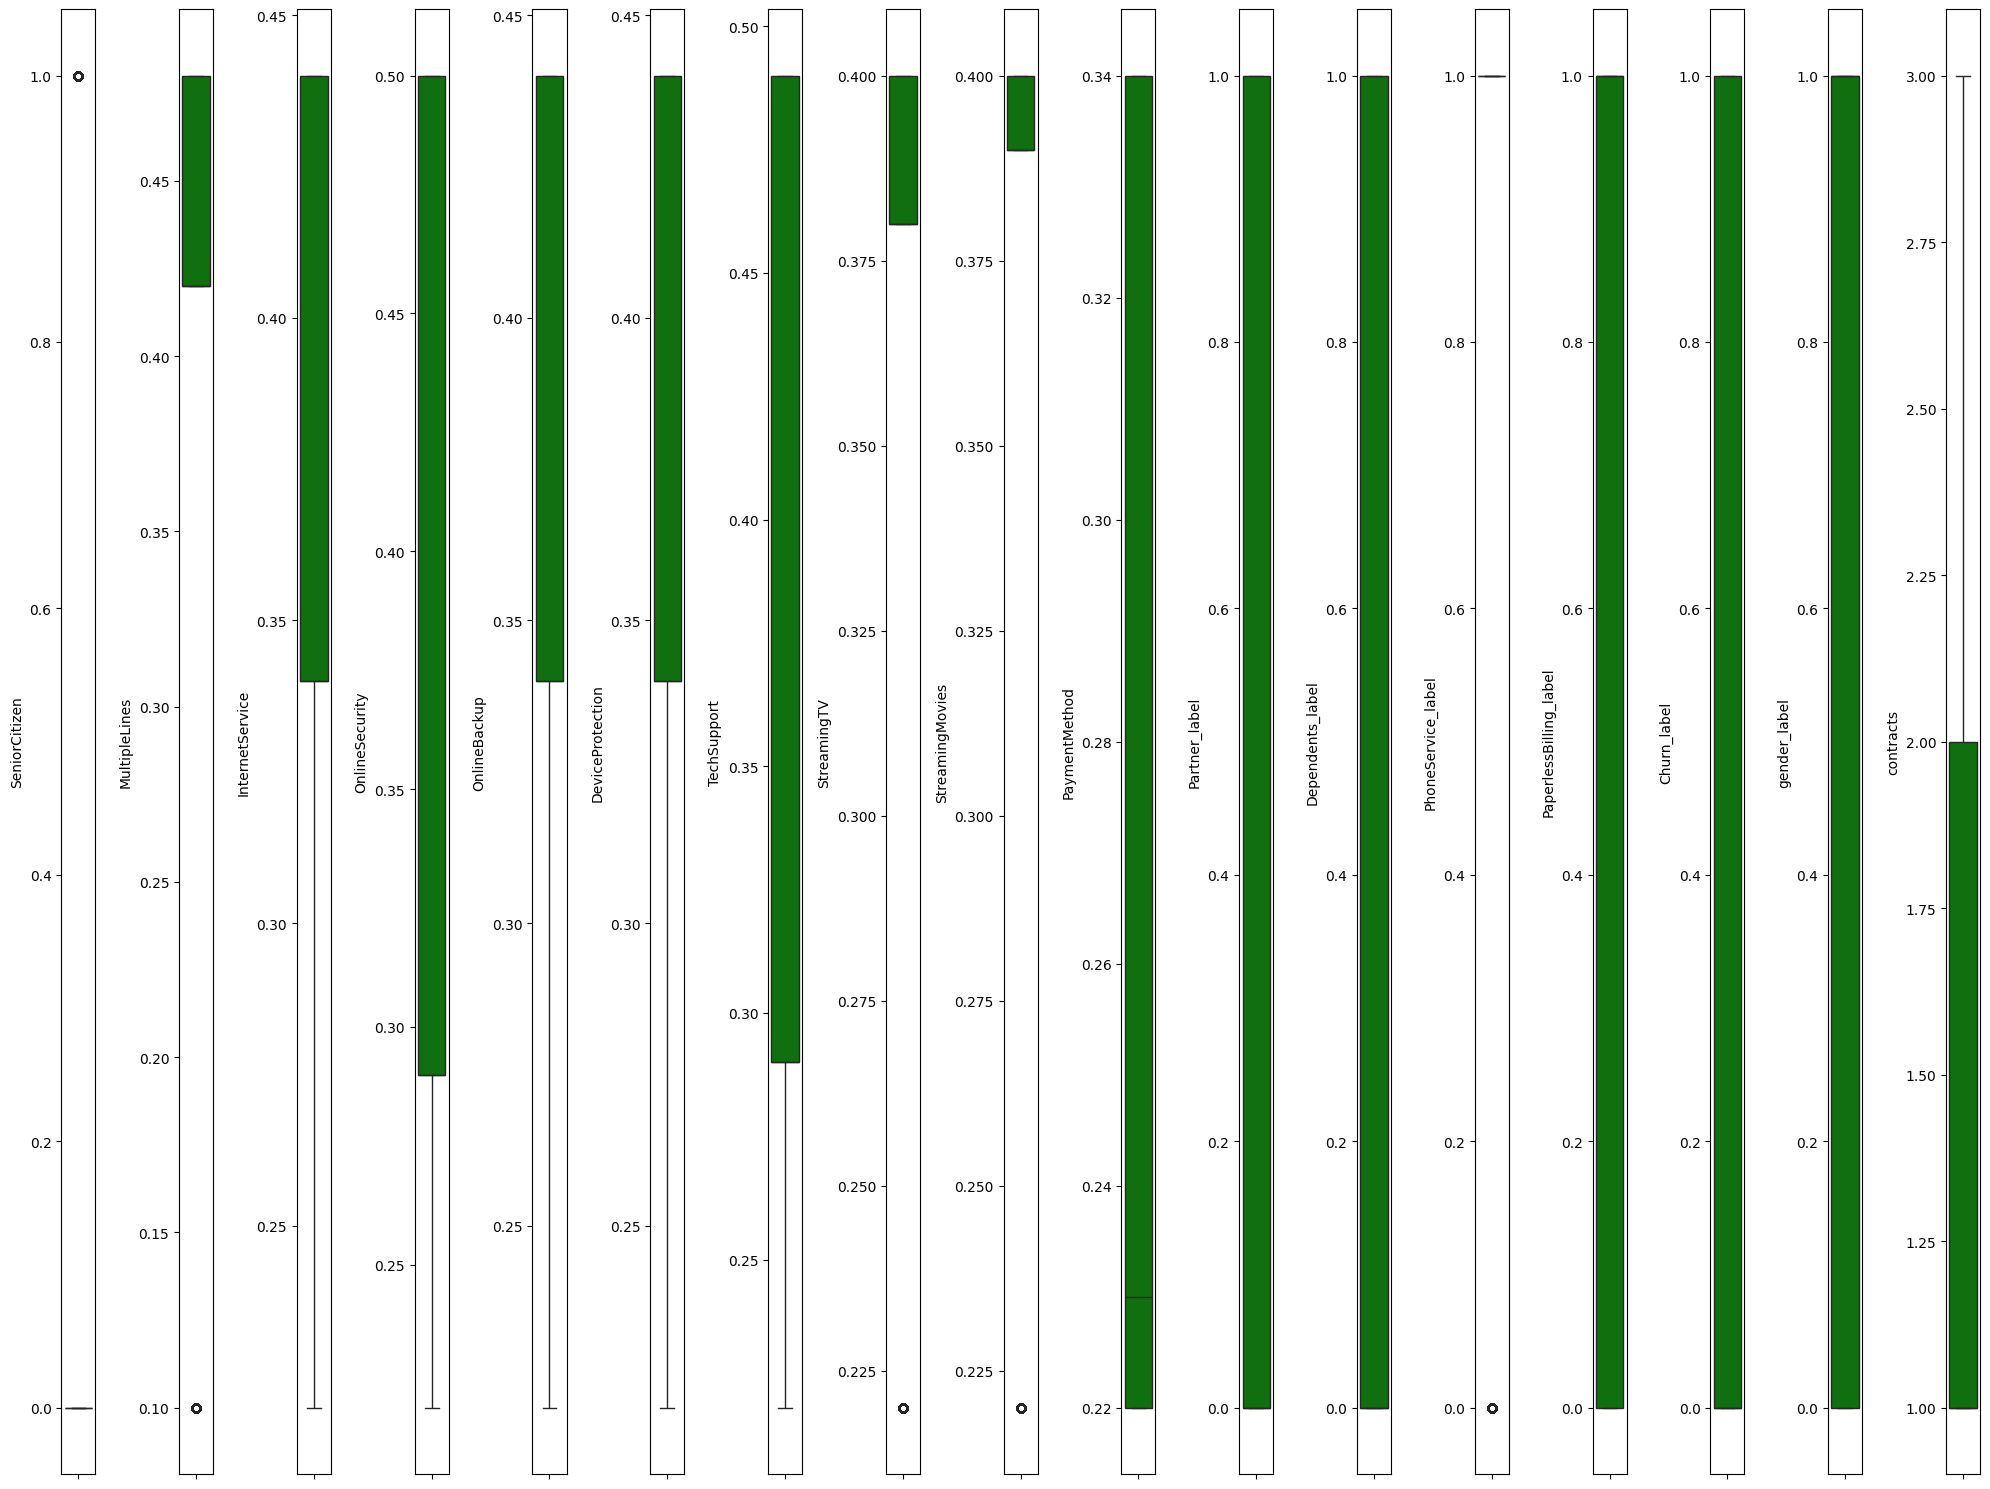

In [53]:
plt.figure(figsize=(20,15))
features = numsbin
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

In [54]:
justnums = ['tenure', 'MonthlyCharges','TotalCharges']

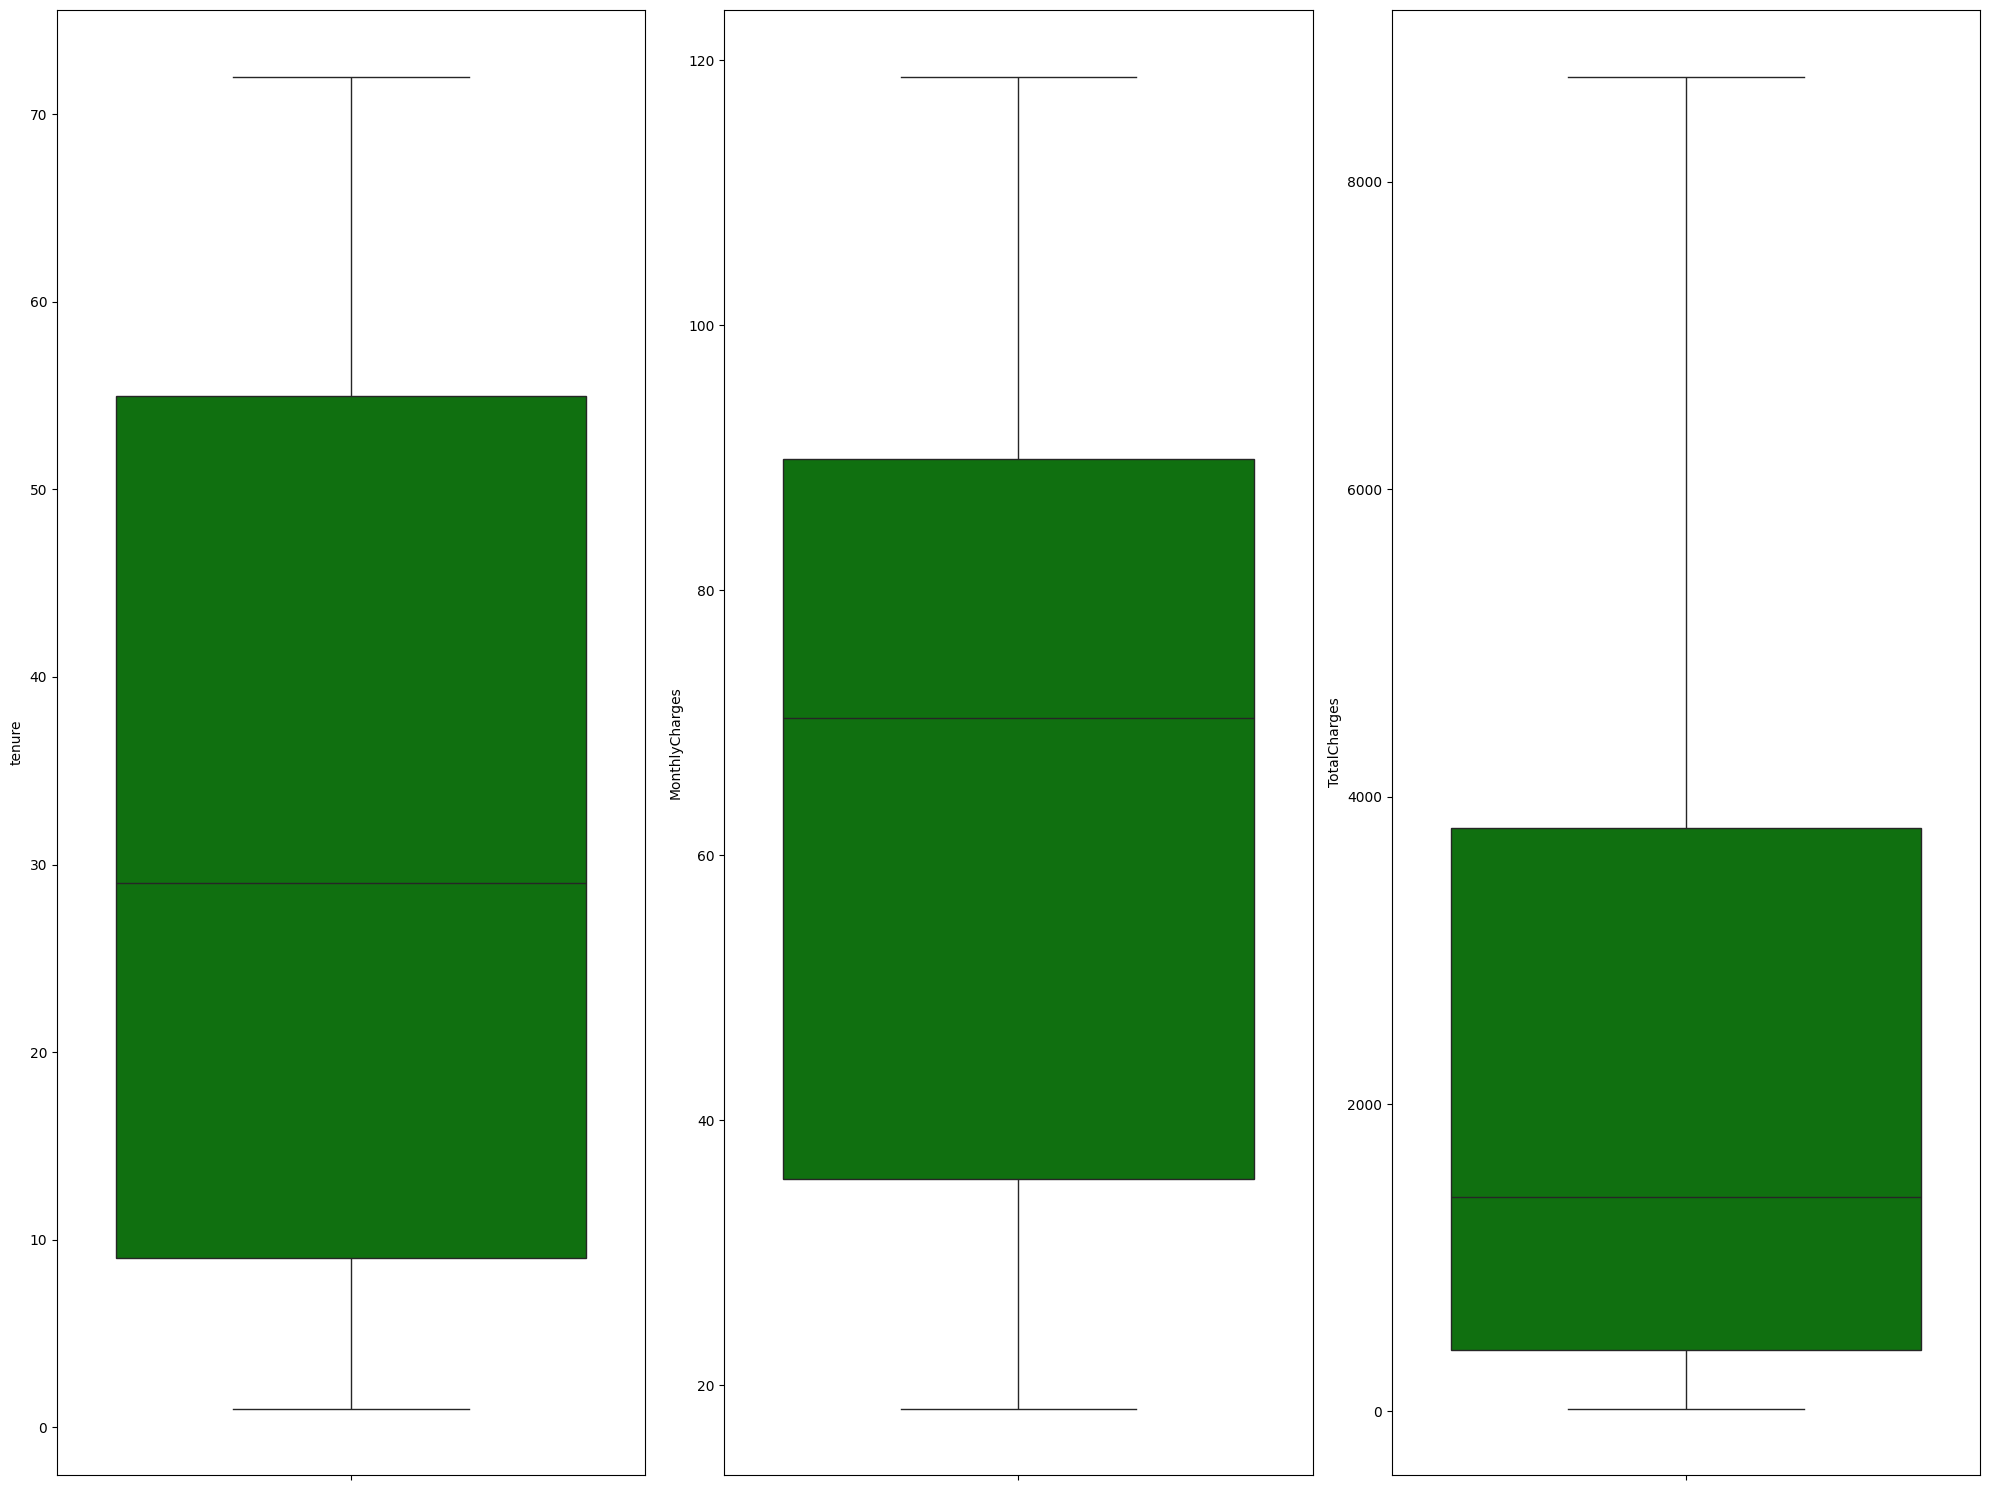

In [55]:
plt.figure(figsize=(20,15))
features = justnums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

there is no very bad outliers in our data, all columns looks normal and good!

### RANDOM FOREST

__TARGET AND FEATURE__

In [59]:
X = df.drop(['Churn_label'],axis = 1)
Y = df['Churn_label']

In [60]:
df['Churn_label'].value_counts()

Churn_label
0    5163
1    1869
Name: count, dtype: int64

__the data is imbalance, using accuracy isn't valid__

we will use AUC or F1

__SPLITTING DATA__

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#80% train
#20% test

In [59]:
X_train.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Partner_label,Dependents_label,PhoneService_label,PaperlessBilling_label,gender_label,contracts
6030,0,43,0.10,0.34,0.50,0.44,0.34,0.49,0.38,0.39,0.22,49.05,2076.20,0,0,0,1,0,1
3410,0,3,0.48,0.34,0.50,0.44,0.44,0.49,0.38,0.40,0.22,53.40,188.70,0,0,1,0,1,1
5483,0,55,0.42,0.44,0.50,0.44,0.34,0.49,0.40,0.40,0.34,77.75,4458.15,1,0,1,1,0,1
5524,0,45,0.48,0.34,0.29,0.44,0.44,0.29,0.40,0.40,0.22,54.65,2553.70,1,1,1,0,1,3
6337,0,55,0.42,0.44,0.29,0.44,0.44,0.49,0.38,0.39,0.23,100.90,5448.60,1,1,1,0,0,2


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
preds_rf = rf.predict(X_test)

In [62]:
preds_rf

array([0, 0, 1, ..., 0, 0, 0])

__METRIC EVALUATION__

In [63]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [64]:
cm = confusion_matrix(y_test, preds_rf)
cm

# y_test = actual
# preds = prediksi

array([[919, 114],
       [194, 180]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [66]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_rf))

AUC  0.6854626212009048


In [67]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_rf))

F1 Score  0.5389221556886228


PRECISSION AND RECALL

In [68]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_rf))

Precision  0.6122448979591837


In [69]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_rf))

Recall  0.48128342245989303


### DECISION TREE

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
preds_dt = dt.predict(X_test)

In [72]:
preds_dt

array([0, 0, 1, ..., 0, 0, 0])

__METRIC EVALUATION__

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [74]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_dt))

AUC  0.6346164796993338


In [75]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_dt))

F1 Score  0.46437994722955145


PRECISSION AND RECALL

In [76]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_dt))

Precision  0.4583333333333333


In [77]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_dt))

Recall  0.47058823529411764


### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
preds_knn = knn.predict(X_test)

In [64]:
preds_knn

array([0, 0, 1, ..., 0, 0, 0])

__METRIC EVALUATION__

In [65]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [66]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_knn))

AUC  0.6631041926583183


In [67]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_knn))

F1 Score  0.5015290519877675


PRECISSION AND RECALL

In [68]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_knn))

Precision  0.5857142857142857


In [69]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_knn))

Recall  0.4385026737967914


## HANDLING OVERSAMPLING WITH SMOTE

In [85]:
y_train.value_counts()

Churn_label
0    4130
1    1495
Name: count, dtype: int64

__FEATURE AND TARGET__

In [86]:
# fitur
X = df.drop(['Churn_label'],axis=1)
# target
y = df['Churn_label']

__SPLITTING DATA --> TRAIN, VAL, TEST__

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [89]:
X_train_, X_test, y_train_, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2, random_state=42)

__RANDOM FOREST SMOTE__

In [90]:
from sklearn.metrics import classification_report

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_test_pred_rf = rf.predict(X_test)
y_val_pred_rf = rf.predict(X_val)

In [92]:
print(classification_report(y_test, y_test_pred_rf, digits=6))

              precision    recall  f1-score   support

           0   0.847265  0.998783  0.916806       822
           1   0.998536  0.821687  0.901520       830

    accuracy                       0.909806      1652
   macro avg   0.922901  0.910235  0.909163      1652
weighted avg   0.923267  0.909806  0.909126      1652



In [93]:
print(classification_report(y_val, y_val_pred_rf, digits=6))

              precision    recall  f1-score   support

           0   0.824955  0.889642  0.856078      1033
           1   0.610922  0.478610  0.536732       374

    accuracy                       0.780384      1407
   macro avg   0.717938  0.684126  0.696405      1407
weighted avg   0.768062  0.780384  0.771192      1407



__DECISION TREE SMOTE__

In [94]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_pred_dt = dt.predict(X_test)
y_val_pred_dt = dt.predict(X_val)

In [95]:
print(classification_report(y_test, y_test_pred_dt, digits=6))

              precision    recall  f1-score   support

           0   0.851813  1.000000  0.919978       822
           1   1.000000  0.827711  0.905735       830

    accuracy                       0.913438      1652
   macro avg   0.925907  0.913855  0.912856      1652
weighted avg   0.926266  0.913438  0.912822      1652



In [96]:
print(classification_report(y_val, y_val_pred_dt, digits=6))

              precision    recall  f1-score   support

           0   0.810078  0.809293  0.809685      1033
           1   0.474667  0.475936  0.475300       374

    accuracy                       0.720682      1407
   macro avg   0.642372  0.642615  0.642493      1407
weighted avg   0.720921  0.720682  0.720801      1407



__KNN SMOTE__

In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_test_pred_knn = knn.predict(X_test)
y_val_pred_knn = knn.predict(X_val)

In [98]:
print(classification_report(y_test, y_test_pred_knn, digits=6))

              precision    recall  f1-score   support

           0   0.701107  0.924574  0.797482       822
           1   0.890845  0.609639  0.723891       830

    accuracy                       0.766344      1652
   macro avg   0.795976  0.767106  0.760686      1652
weighted avg   0.796435  0.766344  0.760508      1652



In [99]:
print(classification_report(y_val, y_val_pred_knn, digits=6))

              precision    recall  f1-score   support

           0   0.813665  0.887706  0.849074      1033
           1   0.585714  0.438503  0.501529       374

    accuracy                       0.768301      1407
   macro avg   0.699689  0.663104  0.675302      1407
weighted avg   0.753072  0.768301  0.756692      1407



## MODELLING WITH SCALLING

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

__RANDOM FOREST SCALLING__

In [105]:
rf_scale = RandomForestClassifier()
rf_scale.fit(X_train, y_train)
preds_rf_scale = rf_scale.predict(X_test)

__METRIC EVALUATION__

using metric evaluation because the scalled data isn't imballance

In [106]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_rf_scale))

AUC  0.9078254624336763


In [107]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_rf_scale))

F1 Score  0.8986083499005965


PRECISION AND RECALL

In [108]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_rf_scale))

Precision  0.9985272459499264


In [110]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_rf_scale))

Recall  0.8168674698795181


__DECISION TREE SCALLING__

In [111]:
dt_scale = DecisionTreeClassifier()
dt_scale.fit(X_train,y_train)
preds_dt_scale = dt_scale.predict(X_test)

__METRIC EVALUATION__

In [112]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_dt_scale))

AUC  0.9096385542168675


In [113]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_dt_scale))

F1 Score  0.9006622516556292


PRECISION AND RECALL

In [114]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_dt_scale))

Precision  1.0


In [115]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_dt_scale))

Recall  0.8192771084337349


__KNN SCALLING__

In [117]:
knn_scale = KNeighborsClassifier()
knn_scale.fit(X_train,y_train)
preds_knn_scale = knn_scale.predict(X_test)

__METRIC EVALUATION__

In [118]:
from sklearn.metrics import roc_auc_score
print('AUC ',roc_auc_score(y_test, preds_knn_scale))

AUC  0.7671063817313047


In [119]:
from sklearn.metrics import f1_score
print('F1 Score ',f1_score(y_test, preds_knn_scale))

F1 Score  0.7238912732474965


PRECISION AND RECALL

In [120]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(y_test, preds_knn_scale))

Precision  0.8908450704225352


In [121]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(y_test, preds_knn_scale))

Recall  0.6096385542168675


# SUMMARY

The best model based on training data and testing data is KNN SMOTE because the accuracy between testing data and evaluating data not much diffrent, which indicates that the data is not overfitting or underfitting. The other modelling have the highest AUC or F1 but, the data is imballance.